Çok Değişkenli Veri Analizi
Pivot Tablosu
Pivot tablo , veritabanı, iş zekası programı ya da veri tablosu gibi daha geniş bir tabloyu özetleyen istatistik tabosudur. Bu özet, pivot tabloyu önemli bir şekilde gruplayan toplamları, ortalamaları veya diğer istatistikleri içerebilir.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#python'da uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

#veriyi içeri aktaracağız
veri=pd.read_csv("olimpiyatlar_temizlenmis.csv")

In [29]:
veri_pivot=veri.pivot_table(index="madalya",columns='cinsiyet',
                values=["boy","kilo","yas"],
                aggfunc={"boy":np.mean,'kilo':np.mean,'yas':[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

Aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir. İkincisi bazen veri kümesinden çıkarılır. Bir aykırı değer istatiksel analizlerde ciddi sorunlara neden olabilir.

In [30]:
def anomaliTespiti(df,ozellik):
    outlier_indices=[]

    for c in ozellik:
        #1. çeyrek
        Q1=np.percentile(df[c],25)
        #3. çeyrek
        Q3=np.percentile(df[c],75)
        #IQR: Çeyrekler açıklığı
        IQR=Q3-Q1
        # aykırı tespiti için çarpan
        outlier_step=IQR*1.5
        # aykırıyı ve aykırı indeksini tespit et
        outlier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
        #indeksleri depola
        outlier_indices.extend(outlier_list_col)

    # eşsiz aykırı değerleri bul
    outlier_indices=Counter(outlier_indices)    
    # eğer bir örnek (v) 1 farklı sütun için aykırı değerse bunu aykırı olarak kabul et (v>1)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>1)

    return multiple_outliers


In [31]:
veri_anomali=veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

Anomalinin en çok görüldüğü spor branşları yukarıdaki gibidir.

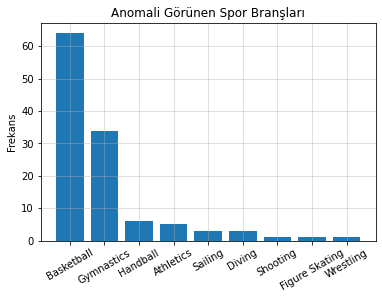

In [33]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomali Görünen Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha=0.5)
plt.show()

Jimnastikte meydana gelen anomali nedeni

In [34]:
veri_gym=veri_anomali[veri_anomali.spor=="Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1736,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
2802,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
3187,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
6486,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
7311,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
7312,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
9561,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
9562,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
9563,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
11245,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [35]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

In [36]:
veri_basket=veri_anomali[veri_anomali.spor=="Basketball"]
veri_basket

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1086,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
1087,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
2848,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
2849,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
3465,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
39645,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
39646,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
39736,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [37]:
veri_basket.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64